In [109]:
# Python
# Created by yangtan on 2022/11/8.

In [103]:
import numpy as np
import matplotlib.pyplot as plt

In [104]:
def difference(x, y, g):
    x_ = np.array(x)
    x_ = np.insert(np.append(x_, x_[-1]), 0, x_[0])
    x = x_[:, np.newaxis]
    
    y_ = np.array(y)
    y_ = np.insert(np.append(y_, y_[-1]), 0, y_[0])
    y = y_[:, np.newaxis]
    
    n = x.shape[0]
    t = np.zeros((n,2))

    table = np.concatenate([x,y,t], 1)
    table[0,2] = g[0]
    table[n-2,2] = g[1]
    for j in range(2,4):
        for i in range(n-1):
            if (i==0 and j==2) or (i==n-2 and j==2):
                continue
            if j==2:
                table[i,j] = (table[i+1,j-1] - table[i,j-1]) / (table[i+1,0] - table[i,0])
            else:
                if i >= n-2:
                    break
                table[i,j] = (table[i+1,j-1] - table[i,j-1]) / (table[i+2,0] - table[i,0])
                
    return table[1:n-1, -2], table[:n-2, -1]
           

In [113]:
def spline(X, Y, g):
    n = len(X)
    m = n-1
    h = np.array([X[i+1]-X[i] for i in range(n-1)])
    
    mu = np.array([h[i]/(h[i+1]+h[i]) for i in range(h.shape[0]-1)])
    lam = 1-mu
    
    mu= np.append(mu,1)
    lam = np.insert(lam,0,1)
    
    # 差商表
    d1, d2_ = difference(X, Y, g)
    #获取三转角方程系数矩阵
    d2 = 6*d2_ 
    A = 2*np.eye(n) + np.diag(lam, k=1) + np.diag(mu, k=-1)
    
    # 解三转角方程
    M = np.linalg.solve(A, d2)
    
    c = np.zeros((n-1, 4))
    a, b = c.shape

    for i in range(a):
        c[i,0] = Y[i]
        c[i,1] = d1[i] - (1/3*M[i] + 1/6*M[i+1]) * h[i] 
        c[i,2] = 0.5*M[i]
        c[i,3] = 1/(6*h[i]) * (M[i+1]-M[i])
    
    return np.around(c, 4)
    
x = [i for i in range(11)]
y = [2.51, 3.3, 4.04, 4.70, 5.22, 5.54, 5.78, 5.4, 5.57, 5.70, 5.80]
g = [0.8, 0.2]
c = spline(x, y, g) 
print('各区间系数矩阵为：')
print(c)

各区间系数矩阵为：
[[ 2.510e+00  8.000e-01 -1.500e-03 -8.500e-03]
 [ 3.300e+00  7.715e-01 -2.700e-02 -4.500e-03]
 [ 4.040e+00  7.041e-01 -4.040e-02 -3.700e-03]
 [ 4.700e+00  6.123e-01 -5.140e-02 -4.090e-02]
 [ 5.220e+00  3.868e-01 -1.741e-01  1.074e-01]
 [ 5.540e+00  3.606e-01  1.479e-01 -2.685e-01]
 [ 5.780e+00 -1.491e-01 -6.575e-01  4.266e-01]
 [ 5.400e+00 -1.844e-01  6.222e-01 -2.679e-01]
 [ 5.570e+00  2.565e-01 -1.814e-01  5.490e-02]
 [ 5.700e+00  5.840e-02 -1.680e-02  5.840e-02]]


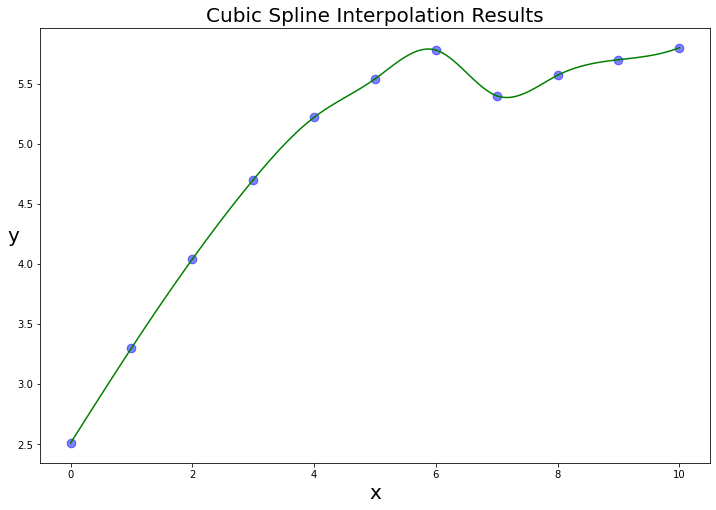

In [106]:
colors = ['#e50000', '#0343df', '#f97306', '#9a0eea', '#00035b',
          '#75bbfd', '#15b01a', '#ffff14', '#ff796c', '#e50000', '#0343df', '#f97306', '#9a0eea', '#00035b',]

def plot_a_range(x1, x2, c, color):
    x = np.linspace(x1,x2,30)
    y = c[0] + c[1]*(x-x1) + c[2]*(x-x1)**2 + c[3]*(x-x1)**3
    plt.plot(x, y, color)

def plot_figure(x,y,c):
    fontsize = 20
    plt.figure(figsize = (12,8))
    plt.scatter(x,y, color='b', s=300, marker='.', alpha=0.5)
    
    n = len(x)-1
    for i in range(n):
        plot_a_range(x[i], x[i+1], c[i,:], 'g')
    plt.xlabel('x', fontsize=fontsize)
    plt.ylabel('y', fontsize=fontsize, rotation=0)
    plt.title('Cubic Spline Interpolation Results', fontsize=fontsize)
    plt.show()
    
plot_figure(x,y,c)    
    

In [108]:
def search(x, x0):
    n = len(x)
    for i in range(n-1):
        if x0 >= x[i] and x0 < x[i+1]:
            return x[i], x[i+1], i

def fit(x0, C):
    x1, x2, index = search(x, x0)
    c = C[index, :]
    return c[0] + c[1]*(x0-x1) + c[2]*(x0-x1)**2 + c[3]*(x0-x1)**3

r = []
for i in range(10):
    x0 = i+0.5
    y0 = np.around(fit(x0, c), 5)
    r.append(y0)
    
print(r)

[2.90856, 3.67844, 4.38149, 4.98819, 5.3833, 5.72371, 5.5944, 5.42986, 5.65976, 5.7323]
